# World Happiness Report
# Problem Statement:
# Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# Inspiration
What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? Did any country experience a significant increase or decrease in happiness?

# What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

# What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. Figure 2.2 shows the average residual for each country when the equation in Table 2.1 is applied to average 2014- 2016 data for the six variables in that country. We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values. As can be seen in Figure 2.2, although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.85 on the 0 to 10 scale.

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?


The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [97]:
#IMPORTING THE LIBRARIES NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



import warnings
warnings.filterwarnings('ignore')

In [98]:
#READ THE DATASET


df=pd.read_csv('C:/Users/HP/Desktop/data sets/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


This dataset of world happiness report depicts the rank of 155 countries and the factors depending upon the happiness of the countries with the 'Happiness score' given.There are two categorical coloumn-'Country' and 'Region'.The Target column or the dependent variable is 'Hapiness score',which is continuous data,so this is a regression problem.Other independent variables like,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption,Generosity and Dystopia Residual contains continuous data.

# EDA

In [99]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

"Country" and "Region" is object datatype.
"Happiness Score" is having integer value and it is ordinal in nature.
and the rest coulmn is float datatype.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [101]:
df.shape

(158, 12)

The data set contains 158 rows and 12 columns.

In [102]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Displaying all the column names.

In [103]:
#CHECKING IS THERE ANY NULL VALUES

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

This dataset contains no Null values.

In [104]:
#understand data at high level.check statistics of dataset.

df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The total count in all the columns is 158,so there is no null values.
In most of the columns mean and median is close to each other,so we can predict that the overall dataset is fairly balanced.
Most of the standard deviation is eqivalent to zero except Happiness rank and Happiness score,so all the datas in the dataset is concentrated close to mean.
There is no such differences in quantile values.


In [105]:
len(df['Country'].unique())

158

The total no of countries are 158.

In [106]:
len(df['Region'].unique())

10

The total no of regions are 10 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

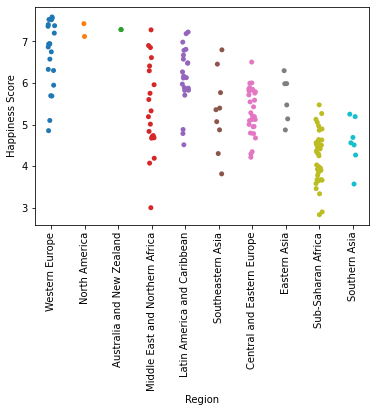

In [107]:

g = sns.stripplot(x="Region", y="Happiness Score", data=df, jitter=True)
plt.xticks(rotation=90)

Region wise Middle East and Northern Africa has highest no of datas and 'North America' and 'Australia and New Zealand' has least no of datas.

In [108]:
df.nlargest(10, ['Happiness Score'])

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Showing top 10 happiest countries of the world.Switzerland is the Happiest countries of the world.

In [109]:
df.nsmallest(10, ['Happiness Score'])

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


Showing least 10 unhappy countries of the world.Togo is the UnHappiest countries of the world.

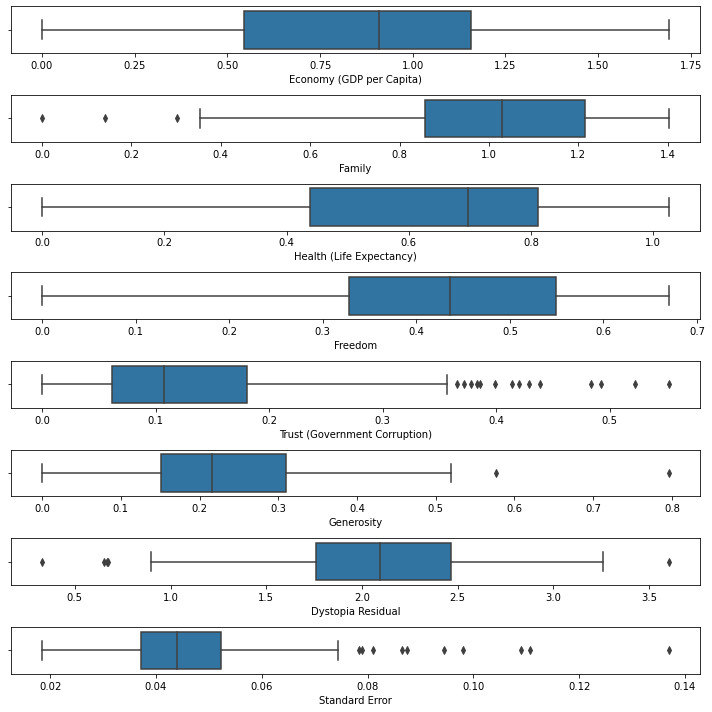

In [110]:
#Outlier Analysis

fig, axs = plt.subplots(8, figsize = (10,10))
plt1 = sns.boxplot(df['Economy (GDP per Capita)'], ax = axs[0])
plt2 = sns.boxplot(df['Family'], ax = axs[1])
plt3 = sns.boxplot(df['Health (Life Expectancy)'], ax = axs[2])
plt4 = sns.boxplot(df['Freedom'], ax = axs[3])
plt5 = sns.boxplot(df['Trust (Government Corruption)'], ax = axs[4])
plt6 = sns.boxplot(df['Generosity'], ax = axs[5])
plt7 = sns.boxplot(df['Dystopia Residual'], ax = axs[6])
plt8 = sns.boxplot(df['Standard Error'], ax = axs[7])

plt.tight_layout()

It is visible quite clearly that the "Standard Error","Dystopia Residual","Generosity","Trust(Goverment Corruption) and "Family" is having outliers present in it.

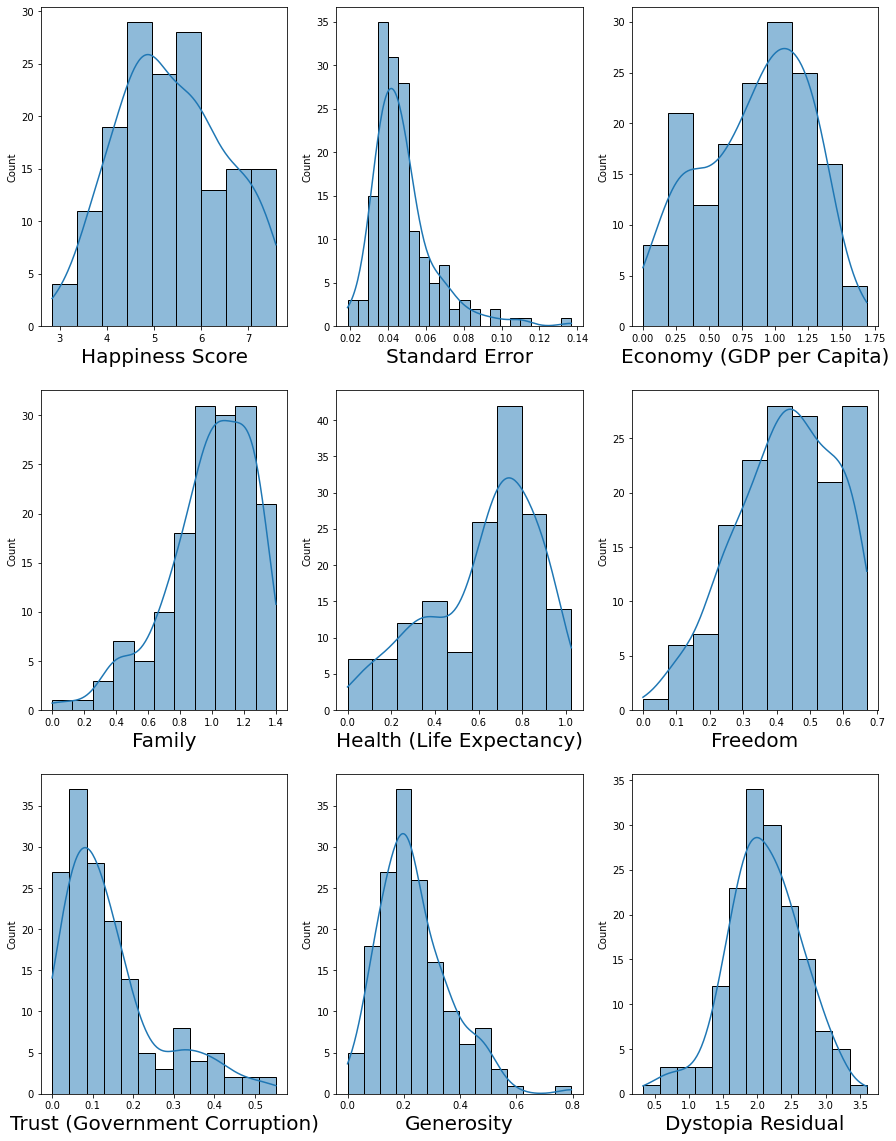

In [111]:
#checking normal distribution by taking the continuous features only:
ds=df[['Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
plt.figure(figsize=(15,20),facecolor='white',)
plotnumber=1
for column in ds:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(ds[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

Watching the histograms closely we can see that,"Stand Error" ,"Trust (Goverment Corruption),"Generosity" is having Right Skewness,"Family" is having Left Skewness."Dystopia Residual" is normally distributed and the rest are close to normally distibuted.

In [112]:
# Droping "Country" Column.
drop_columns = ['Country']
df = df.drop(columns = drop_columns,axis=1)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Droping the country column because it is equivalent to Happiness Rank.The only differnce is ordinal and nominal.

In [113]:
#Encodng the "Region Column"
df['Region']= LabelEncoder().fit_transform(df['Region'])
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [114]:
# Separating the features and target varible
y = df['Happiness Score']
x = df.drop(columns=['Happiness Score'])
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


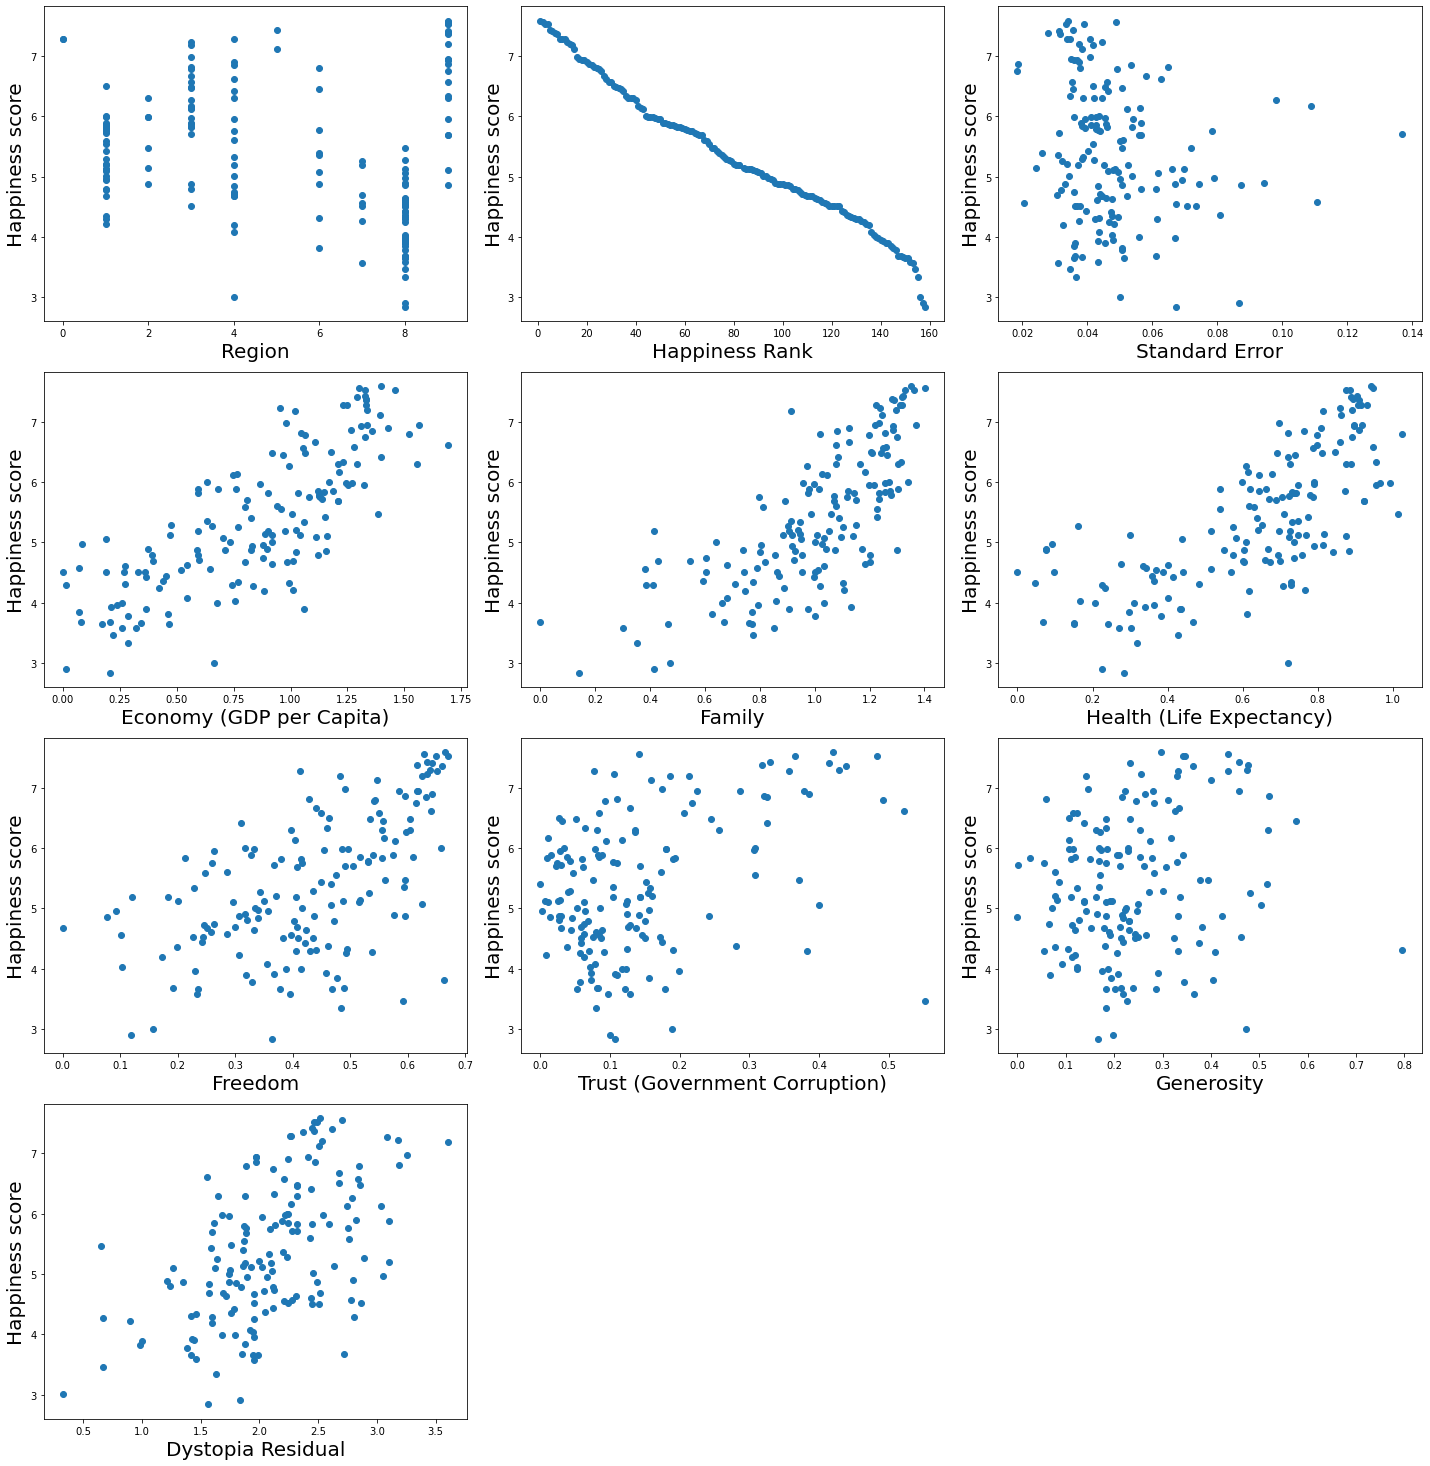

In [115]:
#Plotting the features with the targeted variable
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness score',fontsize=20)
    plotnumber+=1
plt.tight_layout()    

Most of the features have positive realtion with "Happiness Score",other than Region and Happiness Rank.

In [116]:
#Outlier removal with Zscore
zs = zscore(df[['Standard Error','Trust (Government Corruption)','Generosity','Family','Dystopia Residual']]) #converting data into standard normal distribution
abs_z_score=np.abs(zs)

ae=(abs_z_score<2).all(axis=1)

df=df[ae]
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,4.825000,78.775000,5.393458,0.046430,0.863879,1.028920,0.636508,0.413885,0.122494,0.212527,2.115268
std,3.047695,42.141311,1.021167,0.011784,0.372783,0.210076,0.239089,0.146470,0.088615,0.106310,0.467565
min,0.000000,2.000000,3.587000,0.018480,0.000000,0.464750,0.000000,0.000000,0.002270,0.000000,0.998950
25%,2.000000,45.750000,4.639750,0.038282,0.594172,0.891802,0.460545,0.320625,0.058570,0.126970,1.791085
50%,4.000000,78.500000,5.260500,0.044515,0.919550,1.033960,0.700925,0.416795,0.104710,0.203505,2.074475
75%,8.000000,113.250000,5.989000,0.051095,1.148357,1.217087,0.800357,0.531430,0.157820,0.272970,2.447058
max,9.000000,152.000000,7.561000,0.080960,1.563910,1.402230,0.991110,0.669730,0.377980,0.479980,3.191310


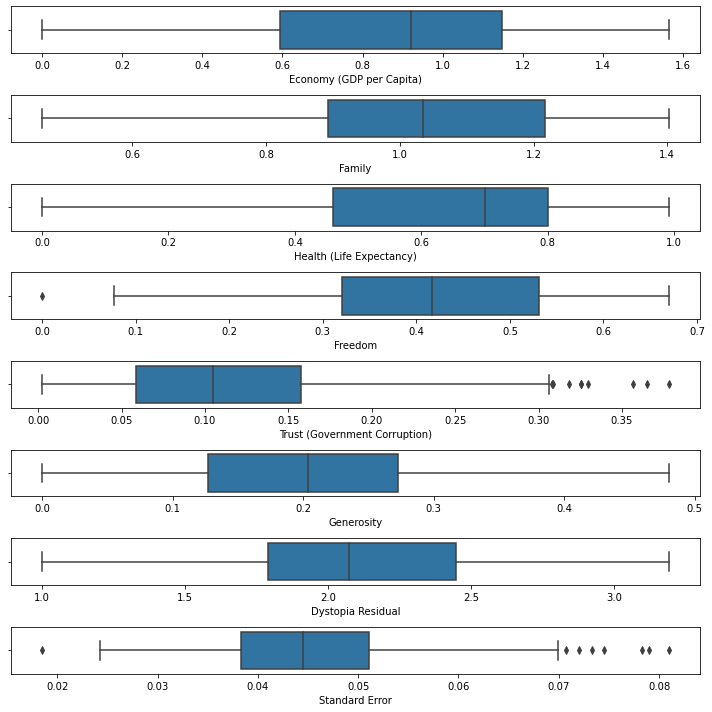

In [117]:
#Outlier Analysis after using zScore

fig, axs = plt.subplots(8, figsize = (10,10))
plt1 = sns.boxplot(df['Economy (GDP per Capita)'], ax = axs[0])
plt2 = sns.boxplot(df['Family'], ax = axs[1])
plt3 = sns.boxplot(df['Health (Life Expectancy)'], ax = axs[2])
plt4 = sns.boxplot(df['Freedom'], ax = axs[3])
plt5 = sns.boxplot(df['Trust (Government Corruption)'], ax = axs[4])
plt6 = sns.boxplot(df['Generosity'], ax = axs[5])
plt7 = sns.boxplot(df['Dystopia Residual'], ax = axs[6])
plt8 = sns.boxplot(df['Standard Error'], ax = axs[7])

plt.tight_layout()

Removed Outlier other that Trust(Goverment Corruption) and Standard Error.

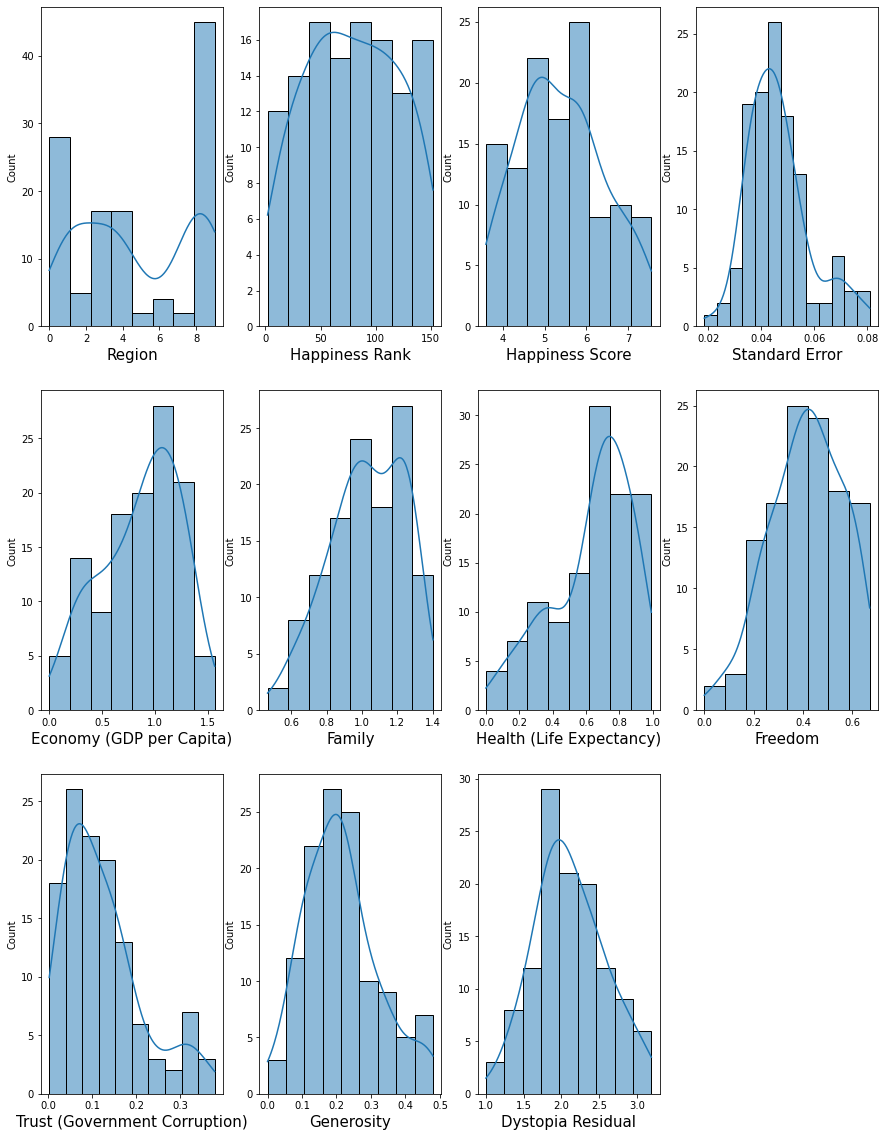

In [121]:
#Plotting after Outlier Removal
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()   

In [119]:
corr = df.corr()
corr

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.249697,-0.202486,0.002725,-0.231128,-0.145469,-0.361071,0.094736,0.192213,0.269339,-0.135202
Happiness Rank,0.249697,1.000000,-0.993415,0.179787,-0.760918,-0.721667,-0.755636,-0.552200,-0.362828,-0.219265,-0.560743
Happiness Score,-0.202486,-0.993415,1.000000,-0.182854,0.757560,0.719676,0.742393,0.559775,0.389841,0.259539,0.568823
Standard Error,0.002725,0.179787,-0.182854,1.000000,-0.187591,-0.181664,-0.253225,-0.125058,-0.040531,0.001840,0.007713
Economy (GDP per Capita),-0.231128,-0.760918,0.757560,-0.187591,1.000000,0.582434,0.801000,0.296661,0.247803,-0.026061,0.051984
Family,-0.145469,-0.721667,0.719676,-0.181664,0.582434,1.000000,0.493883,0.485970,0.256688,0.166174,0.166904
Health (Life Expectancy),-0.361071,-0.755636,0.742393,-0.253225,0.801000,0.493883,1.000000,0.293397,0.114750,0.077511,0.118251
Freedom,0.094736,-0.552200,0.559775,-0.125058,0.296661,0.485970,0.293397,1.000000,0.472193,0.413638,0.120942
Trust (Government Corruption),0.192213,-0.362828,0.389841,-0.040531,0.247803,0.256688,0.114750,0.472193,1.000000,0.301029,0.074020
Generosity,0.269339,-0.219265,0.259539,0.001840,-0.026061,0.166174,0.077511,0.413638,0.301029,1.000000,0.059365


<AxesSubplot:>

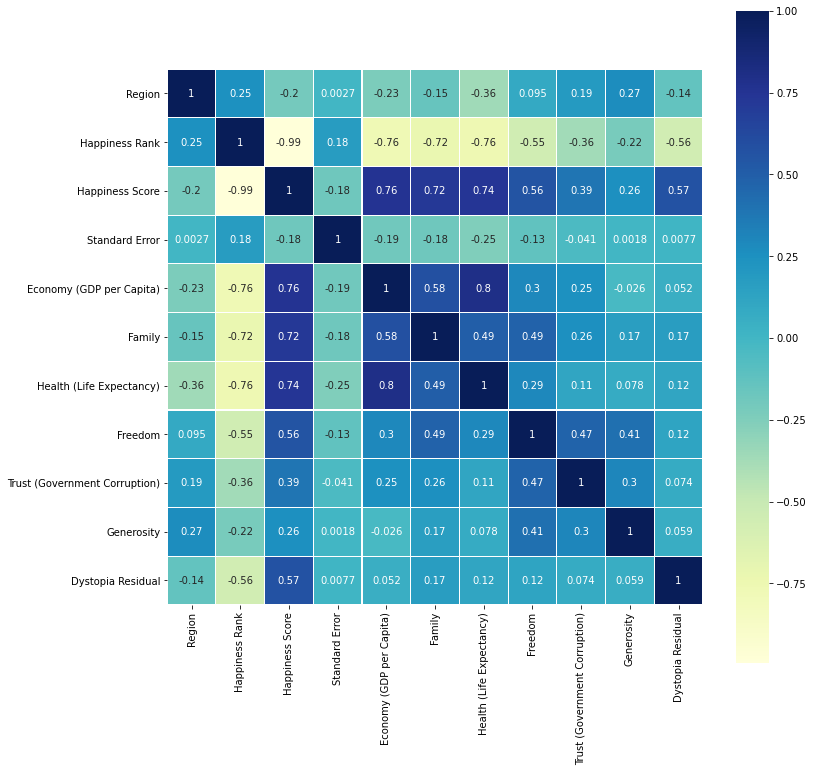

In [122]:
#Checking multicoliniearity ofFeature vs Feature and Feature vs Label with Heat map
wh1 = df[[ 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']] #Subsetting the data
plt.figure(figsize=(12,12))
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor,linewidths=.1, square = True, cmap="YlGnBu",annot=True) #Plot the correlation as heat map

Economy,Family and health have high correlation with Happiness Score.

In [123]:
#Standardizaton with StandardScaler()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [124]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

# Model Creation

1.KNeiborsRegressor
2.SVR
3.AdaBoostRegressor
4.LinearRegression

In [171]:
#Model Training
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [172]:
#Prediction with trained data:
yknpred = kn.predict(x_train)

In [173]:
print("R Square Score of kn:", metrics.r2_score(y_train,yknpred))

R Square Score of kn: 0.9284373339852909


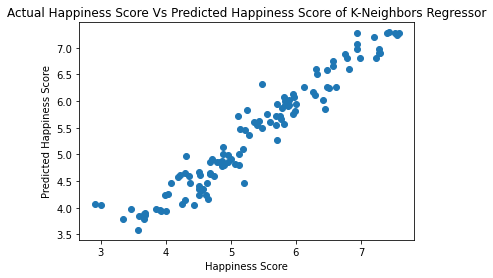

In [174]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yknpred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of K-Neighbors Regressor')
plt.show()

In [175]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

# Evaluation

In [176]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.9214073399914747


In [177]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  0.26098


In [178]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  0.11141669800000002


In [179]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  0.33379139893052967


In [180]:
#Model Training
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [181]:
#Prediction with trained data:
ysvrpred = kn.predict(x_train)

In [182]:
print("R Square Score of kn:", metrics.r2_score(y_train,ysvrpred))

R Square Score of kn: 0.9284373339852909


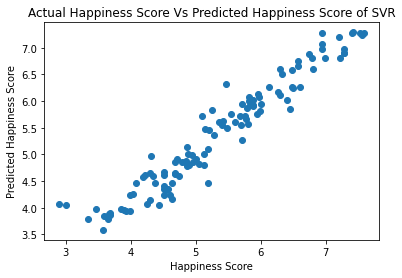

In [183]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ysvrpred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of SVR')
plt.show()

In [184]:
# Predicting test data with model:
y_test_svr_pred = svr.predict(x_test)

# Evaluation

In [185]:
svr_accuracy = metrics.r2_score(y_test,y_test_svr_pred)
print("R Square Score of SVR:",svr_accuracy)

R Square Score of SVR: 0.9735675270531569


In [186]:
print ('mean absolute error of SVR: ',mean_absolute_error(y_test,y_test_svr_pred))

mean absolute error of SVR:  0.13683359116476165


In [187]:
print ('mean squared error of SVR: ',mean_squared_error(y_test,y_test_svr_pred))

mean squared error of SVR:  0.03747193256205007


In [188]:
print ('Root mean squared error of SVR: ',np.sqrt(mean_squared_error(y_test,y_test_svr_pred)))

Root mean squared error of SVR:  0.19357668393184668


In [189]:
#Model Training
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [190]:
#Prediction with trained data:
yabrpred = abr.predict(x_train)

In [191]:
print("R Square Score of AdaBoostRegressor:", metrics.r2_score(y_train,yabrpred))

R Square Score of AdaBoostRegressor: 0.9970926164091839


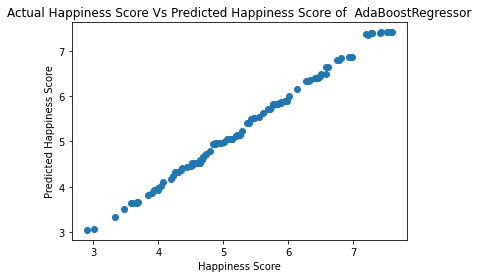

In [192]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yabrpred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of  AdaBoostRegressor')
plt.show()

In [193]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

# Evaluation

In [194]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of AdaBoostRegressor:",abr_accuracy)

R Square Score of AdaBoostRegressor: 0.9955276428229836


In [195]:
print ('mean absolute error of AdaBoostRegressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of AdaBoostRegressor:  0.055810246191589176


In [196]:
print ('mean squared error of AdaBoostRegressor: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of AdaBoostRegressor:  0.006340226541329938


In [197]:
print ('Root mean squared error of AdaBoostRegressor: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of AdaBoostRegressor:  0.07962553950416876


In [198]:
#Model Training
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [199]:
#Prediction with trained data:
ylrpred = lr.predict(x_train)

In [200]:
print("R Square Score of Linear Regression:", metrics.r2_score(y_train,ylrpred))

R Square Score of Linear Regression: 0.9999999451038596


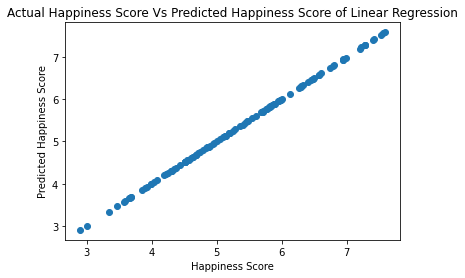

In [201]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ylrpred)
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual Happiness Score Vs Predicted Happiness Score of Linear Regression')
plt.show()

In [202]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

# Evaluation

In [203]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.9999999347600026


In [204]:
print ('mean absolute error of Linear Regression: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of Linear Regression:  0.00026162624035681593


In [205]:
print ('mean squared error of Linear Regression: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of Linear Regression:  9.248732749715894e-08


In [206]:
print ('Root mean squared error of Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of Linear Regression:  0.0003041172923349788


# Evaluation with Cross validation in each model

In [214]:
#Cv of KNN Regression
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean())

[0.93024736 0.93122893 0.88438999 0.90762772 0.81303041]
mean : 0.8933048833994512


In [215]:
#CV of Support Vector Regressor
svr_cv_score = cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print(svr_cv_score)
print('mean :',svr_cv_score.mean())

[0.97792015 0.88669579 0.92016579 0.93792751 0.85054539]
mean : 0.9146509236483971


In [216]:
#CV of Adaboost Regressor
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean())

[0.99652127 0.99578242 0.99493348 0.98463136 0.99183614]
mean : 0.9927409344007382


In [217]:
#CV of Linear Regression
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.99999994 0.99999993 0.99999989 0.99999995 0.99999993]
mean : 0.999999928627201


Now checking the diff between R2 score and Cross Validation score of each model for determing the best model.we will assume the best model having the least differnce.

1.KNeiborsRegressor = 0.92-0.89=0.3
2.SVR = 0.93-0.91=0.2
3.Adaboost Regressor=0.995-0.992=0.003
4.Linear Regressor=0.999-0.999=0

Here we got the least differnce i.e 0 of Linear Regression Model.hence selecting Linear Regression as the best model.



# Hyper Parameter Tuning

In [211]:
ridge=Ridge()
parameters={'alpha':[0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,0.091]}
ridge_regressor = GridSearchCV(ridge,parameters,cv=5) 
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.011, 0.021, 0.031, 0.041, 0.051,
                                   0.061, 0.071, 0.081, 0.091]})

In [212]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
0.9999999258245275


After HyperParameter tuning we are getting the same result.Thus saving Linear Regression as the best model for World Happiness Report.

In [218]:

# model prediction using Linear Regression
x_predict = list(lr.predict(x_test))
lr_world_happiness = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(lr_world_happiness))

     predicted_values  orignal_values
6            7.378067           7.378
103          4.799526           4.800
62           5.754344           5.754
45           5.987084           5.987
131          4.270555           4.271
145          3.780743           3.781
116          4.564744           4.565
54           5.847671           5.848
23           6.797729           6.798
89           5.073258           5.073
2            7.526963           7.527
20           6.867184           6.867
13           7.187351           7.187
19           6.901384           6.901
91           5.013161           5.013
77           5.268104           5.268
144          3.819134           3.819
75           5.332535           5.332
42           6.122844           6.123
142          3.896440           3.896
108          4.694002           4.694
44           5.995168           5.995
7            7.363576           7.364
88           5.097599           5.098
157          2.839026           2.839
97          

In [219]:
#import joblib
#Saving the model
import joblib

joblib.dump(lr,'lr_worldhappiness.obj')

['lr_worldhappiness.obj']

In [220]:
#Testing the saved model
lr_from_joblib=joblib.load('lr_worldhappiness.obj')
lr_from_joblib.predict(x_test)

array([7.37806721, 4.79952608, 5.75434369, 5.98708398, 4.27055475,
       3.78074321, 4.56474419, 5.84767147, 6.7977289 , 5.07325805,
       7.52696301, 6.8671841 , 7.18735093, 6.90138383, 5.01316138,
       5.26810352, 3.81913439, 5.33253509, 6.12284359, 3.89643962,
       4.69400232, 5.99516756, 7.36357606, 5.09759941, 2.83902639,
       4.88442675, 6.85296964, 5.19230963, 6.66967784, 3.65508018,
       6.16764769, 5.58871583, 6.29820602, 3.95561679, 7.11950062,
       4.78649529, 4.33211284, 5.12315026, 4.41922683, 4.9711465 ])

# Conclusion

By examining this data minutely i conclude that,each differnt factors put an impact in 'Happiness" of a country.In the regions having more Economic Gdp have the greatest form of Happiness.Naturally 'Health' of a place also relate with the term Happiness.In the other hand trust in the goverment and generosity is lesser to the unhapiest countries of the world.We can predict the happiness score in future by this linear Regression model made above.